In [156]:
import os
import pandas as pd
import numpy as np
import scipy
from scipy import optimize
import matplotlib.pyplot as plt

from lmfit import Model

In [102]:
path='./db/' # dove sono i file excel
files = os.listdir(path)
i = 0

print('File caricati:')

for file in files:
    print(file)
    file = path + file
    meta = pd.read_excel(file,sheet_name=0,header=None)
    freq = pd.read_excel(file,sheet_name=1)
    fft = pd.read_excel(file,sheet_name=2)
    
    if i==0:
        a=np.array([meta.iloc[0,1],meta.iloc[3,1]])
        info = pd.DataFrame([a],columns=['run','cavfreq']) # -> Qui tengo le frequenze di cavità 
    
        data = pd.DataFrame({'freq':freq[1],'fft0':fft[1]}) # -> Qui frequenze e fft
        
    else:
        info.loc[len(info)]=list([meta.iloc[0,1],meta.iloc[3,1]])
        
        colname = 'fft' + str(i)
        data[colname]=fft2[1]
        
    i += 1
    
    
info['run'] = pd.to_numeric(info['run'],downcast='integer')

File caricati:
AnalyzedDataFFT_Run_409_sliced.xlsx
AnalyzedDataFFT_Run_407_sliced.xlsx
AnalyzedDataFFT_Run_415_sliced.xlsx
AnalyzedDataFFT_Run_404_sliced.xlsx
AnalyzedDataFFT_Run_413_sliced.xlsx
AnalyzedDataFFT_Run_395_sliced.xlsx
AnalyzedDataFFT_Run_394_sliced.xlsx
AnalyzedDataFFT_Run_401_sliced.xlsx
AnalyzedDataFFT_Run_389_sliced.xlsx
AnalyzedDataFFT_Run_392_sliced.xlsx
AnalyzedDataFFT_Run_399_sliced.xlsx
AnalyzedDataFFT_Run_397_sliced.xlsx
AnalyzedDataFFT_Run_411_sliced.xlsx


In [108]:
#meta = pd.read_excel('db/AnalyzedDataFFT_Run_389_sliced.xlsx',sheet_name=0,header=None)
#freq = pd.read_excel('db/AnalyzedDataFFT_Run_389_sliced.xlsx',sheet_name=1)
#fft = pd.read_excel('db/AnalyzedDataFFT_Run_389_sliced.xlsx',sheet_name=2)
#
#meta
#
#meta2 = pd.read_excel('db/AnalyzedDataFFT_Run_394_sliced.xlsx',sheet_name=0,header=None)
#freq2 = pd.read_excel('db/AnalyzedDataFFT_Run_394_sliced.xlsx',sheet_name=1)
#fft2 = pd.read_excel('db/AnalyzedDataFFT_Run_394_sliced.xlsx',sheet_name=2)
data

,freq,fft0,fft1,fft2,fft3,fft4,fft5,fft6,fft7,fft8,fft9,fft10,fft11,fft12
0,1.035190e+10,0.000049,0.000049,0.000049,0.000049,0.000049,0.000049,0.000049,0.000049,0.000049,0.000049,0.000049,0.000049,0.000049
1,1.035190e+10,0.000049,0.000049,0.000049,0.000049,0.000049,0.000049,0.000049,0.000049,0.000049,0.000049,0.000049,0.000049,0.000049
2,1.035190e+10,0.000049,0.000049,0.000049,0.000049,0.000049,0.000049,0.000049,0.000049,0.000049,0.000049,0.000049,0.000049,0.000049
3,1.035190e+10,0.000049,0.000049,0.000049,0.000049,0.000049,0.000049,0.000049,0.000049,0.000049,0.000049,0.000049,0.000049,0.000049
4,1.035190e+10,0.000049,0.000049,0.000049,0.000049,0.000049,0.000049,0.000049,0.000049,0.000049,0.000049,0.000049,0.000049,0.000049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3067,1.035390e+10,0.000049,0.000049,0.000049,0.000049,0.000049,0.000049,0.000049,0.000049,0.000049,0.000049,0.000049,0.000049,0.000049
3068,1.035390e+10,0.000049,0.000049,0.000049,0.000049,0.000049,0.000049,0.000049,0.000049,0.000049,0.000049,0.000049,0.000049,0.000049
3069,1.035390e+10,0.000049,0.000049,0.000049,0.000049,0.000049,0.000049,0.000049,0.000049,0.000049,0.000049,0.000049,0.000049,0.000049
3070,1.035390e+10,0.000049,0.000049,0.000049,0.000049,0.000049,0.000049,0.000049,0.000049,0.000049,0.000049,0.000049,0.000049,0.000049


In [109]:
#meta = pd.DataFrame(np.array([meta.iloc[0,1],meta.iloc[3,1]]),columns=['run','cavfreq'])
#meta

#a=np.array([meta.iloc[0,1],meta.iloc[3,1]])
#info = pd.DataFrame([a],columns=['run','cavfreq'])
#info['run'] = pd.to_numeric(info['run'],downcast='integer') # -> converto run in intero
#info
#
#info.loc[len(info)]=list([meta2.iloc[0,1],meta2.iloc[3,1]])
#print(meta)
#print(meta2)
info

,run,cavfreq
0,409,1.035336e+10
1,407,1.035335e+10
2,415,1.035339e+10
3,404,1.035337e+10
4,413,1.035338e+10
5,395,1.035347e+10
6,394,1.035347e+10
7,401,1.035339e+10
8,389,1.035352e+10
9,392,1.035349e+10


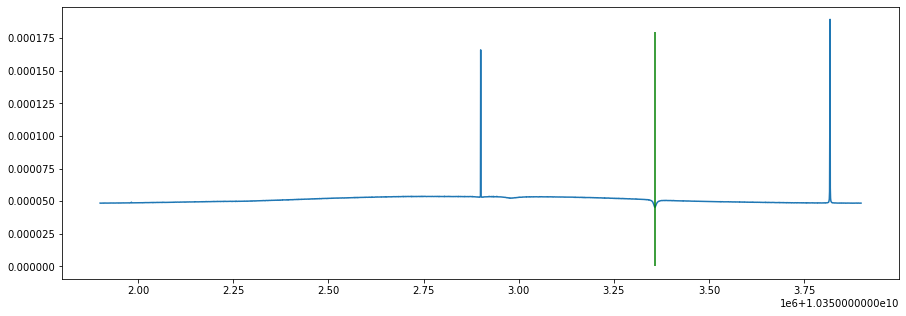

In [110]:
# I dati sono così

plt.figure(figsize=(15,5))
plt.plot(data['freq'],data['fft0'])

plt.vlines(info['cavfreq'][0],0,.00018,'green') # frequenza di cavità
plt.show()

In [118]:
# trasformo le frequenze in Mhz e le traslo così è più semplice lavorare
info['cavfreq'] = (info['cavfreq']/1e9 - 10.35) *1e3
data['freq'] = (data['freq']/1e9 - 10.35) *1e3

# e trasformo anche fft
for name in data:
    if name != 'freq':
        data[name] *= 1e5

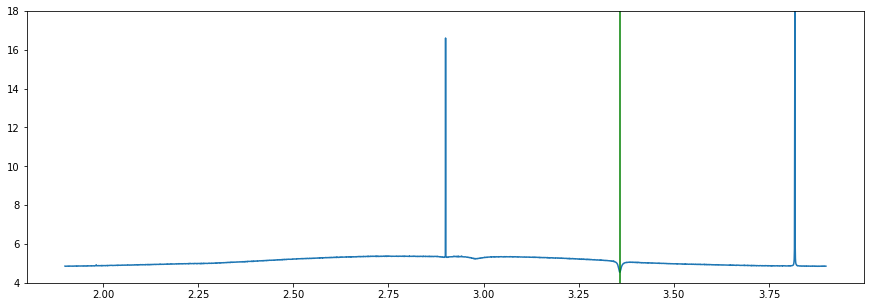

In [122]:
# dopo la trasformazione

plt.figure(figsize=(15,5))
plt.plot(data['freq'],data['fft0'])

plt.vlines(info['cavfreq'][0],4,18,'green') # frequenza di cavità
plt.ylim([4,18])
plt.show()

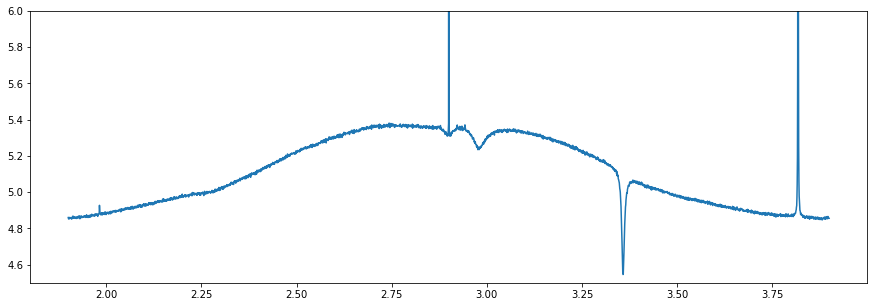

In [125]:
# notare che non è una linea dritta

plt.figure(figsize=(15,5))
plt.plot(data['freq'],data['fft0'])

#plt.vlines(info['cavfreq'][0],4,18,'green') # frequenza di cavità
plt.ylim([4.5,6])
plt.show()

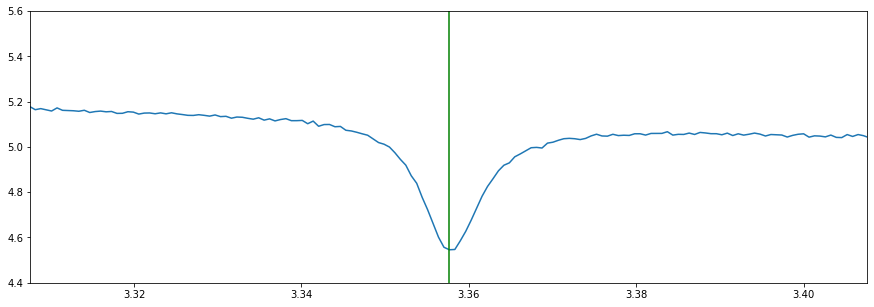

In [133]:
# zoom sulla cavità intorno a delta
delta = .05
center = info['cavfreq'][0]

plt.figure(figsize=(15,5))
plt.plot(data['freq'],data['fft0'])

plt.vlines(center,4,18,'green')
plt.ylim([4.4,5.6])
plt.xlim([center-delta,center+delta])
plt.show()

[ 3.35759900e+00  5.40821998e+05  3.35759900e+00  2.20000000e+04
  4.34362965e-02 -1.77317602e-13]


/home/edi/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


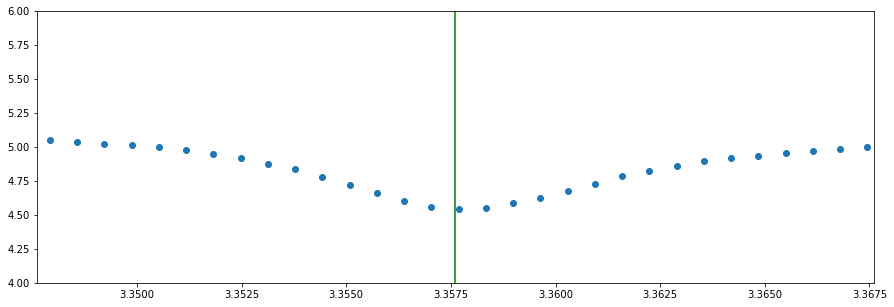

In [244]:
# Fit

def fitm(x,a,b,c,d,e,f):
    return e**2*abs(x-a+1j*b)**2/abs(x-c+1j*d)**2+f*(x-c)

delta = .01
scale = 1    # fattore di scala per lo zoom

plt.figure(figsize=(15,5))
plt.plot(data['freq'],data['fft0'],'o')

plt.vlines(center,0,6,'green')
plt.ylim([4,6])
#plt.ylim([0,6]) # commenta se vuoi vedere il fit di scipy
plt.xlim([center-scale*delta,center+scale*delta])


# fit
param,cov = scipy.optimize.curve_fit(fitm, freq[1], fft[1], p0=[center,2e4,center,2.2e4,1e-2,1e-8],maxfev=10_000)
print(param)
a,b,c,d,e,f = param
x=np.linspace(center-scale*delta,center+scale*delta)
plt.plot(x,fitm(x,a,b,c,d,e,f))

plt.show()

In [245]:

fmodel = Model(fitm)
ps = fmodel.make_params(a=center, b=2e4, c=center,d=2.2e4,e=1e-2,f=1e-8)
ps.add('a', value=center, min=center*0.999, max=center*1.01)
ps.add('c', value=center, min=center*0.999, max=center*1.01)


# solo in prossimità della cavità
interval = data[(data['freq']>center-scale*delta) & (data['freq']<center+scale*delta)]

#result = fmodel.fit(interval['fft0'],x=interval['freq'], params=ps)#, weights=pesi, x=convx)
result = fmodel.fit(interval['fft0'],x=interval['freq'], params=ps)#, weights=pesi, x=convx)

In [246]:
result

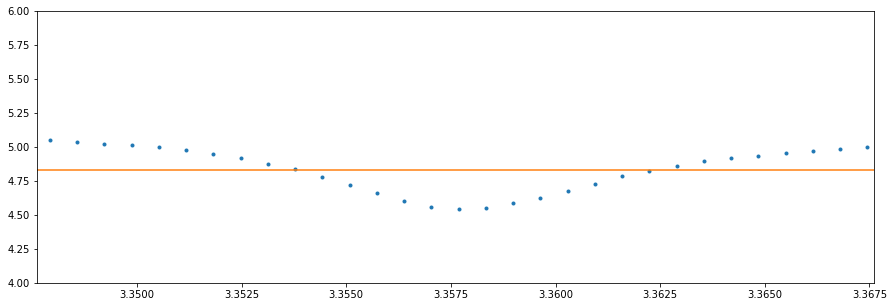

In [249]:
#scale=1
plt.figure(figsize=(15,5))
plt.ylim([4,6])
plt.xlim([center-scale*delta,center+scale*delta])
#plt.xlim([min(data['freq']),max(data['freq'])])

plt.plot(data['freq'],data['fft0'],'.')
plt.plot(result.best_fit)
#plt.plot(result.init_fit)

plt.show()

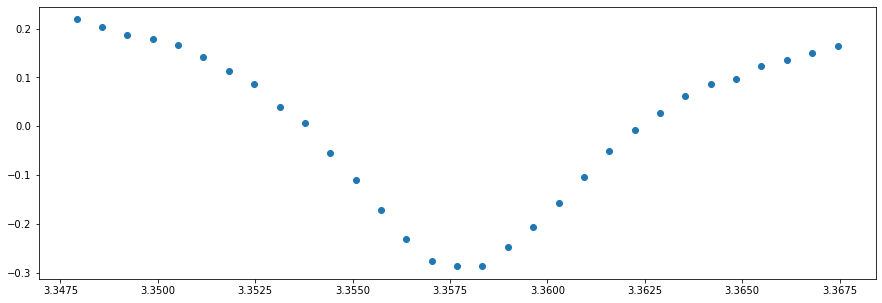

In [250]:
plt.figure(figsize=(15,5))
plt.plot(interval['freq'],interval['fft0']-result.best_fit,'o')

plt.show()

In [235]:
result.best_fit

array([5.12613922, 5.12613361, 5.126128  , ..., 5.10891002, 5.10890441,
       5.1088988 ])